In [1]:
import pandas as pd

df = pd.read_csv("mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
df.rename(columns={"Unnamed: 0": "car"}, inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df['cyl'].value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

In [4]:
df['vs'].value_counts()

vs
0    18
1    14
Name: count, dtype: int64

In [5]:
df['gear'].value_counts()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [6]:
df['carb'].value_counts()

carb
4    10
2    10
1     7
3     3
6     1
8     1
Name: count, dtype: int64

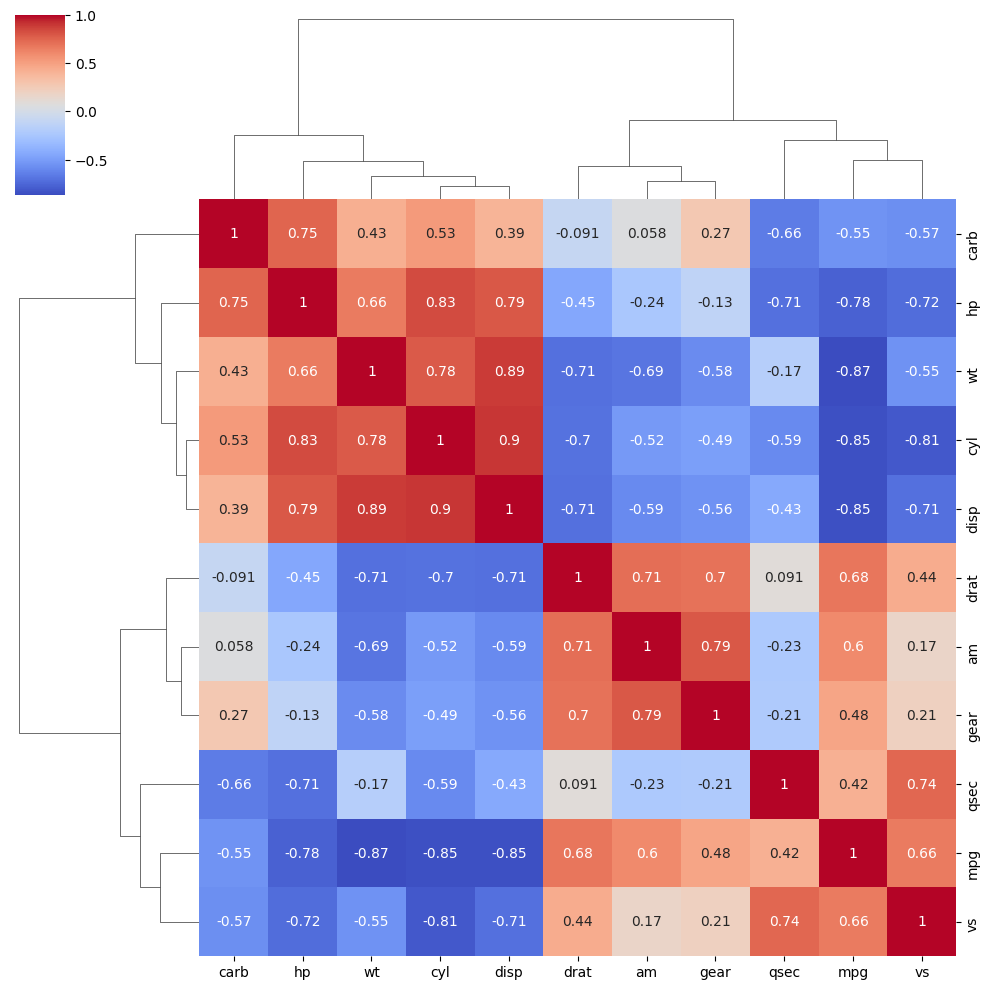

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include="number")
corr = num_df.corr()
sns.clustermap(
    corr,
    annot=True,
    cmap="coolwarm",
)
plt.show()

In [13]:
threshold = 0.7

high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        value = corr.iloc[i, j]
        if abs(value) >= threshold:
            high_corr_pairs.append(
                (corr.columns[i], corr.columns[j], value.round(2))
            )

high_corr_pairs

[('mpg', 'cyl', np.float64(-0.85)),
 ('mpg', 'disp', np.float64(-0.85)),
 ('mpg', 'hp', np.float64(-0.78)),
 ('mpg', 'wt', np.float64(-0.87)),
 ('cyl', 'disp', np.float64(0.9)),
 ('cyl', 'hp', np.float64(0.83)),
 ('cyl', 'wt', np.float64(0.78)),
 ('cyl', 'vs', np.float64(-0.81)),
 ('disp', 'hp', np.float64(0.79)),
 ('disp', 'drat', np.float64(-0.71)),
 ('disp', 'wt', np.float64(0.89)),
 ('disp', 'vs', np.float64(-0.71)),
 ('hp', 'qsec', np.float64(-0.71)),
 ('hp', 'vs', np.float64(-0.72)),
 ('hp', 'carb', np.float64(0.75)),
 ('drat', 'wt', np.float64(-0.71)),
 ('drat', 'am', np.float64(0.71)),
 ('qsec', 'vs', np.float64(0.74)),
 ('am', 'gear', np.float64(0.79))]

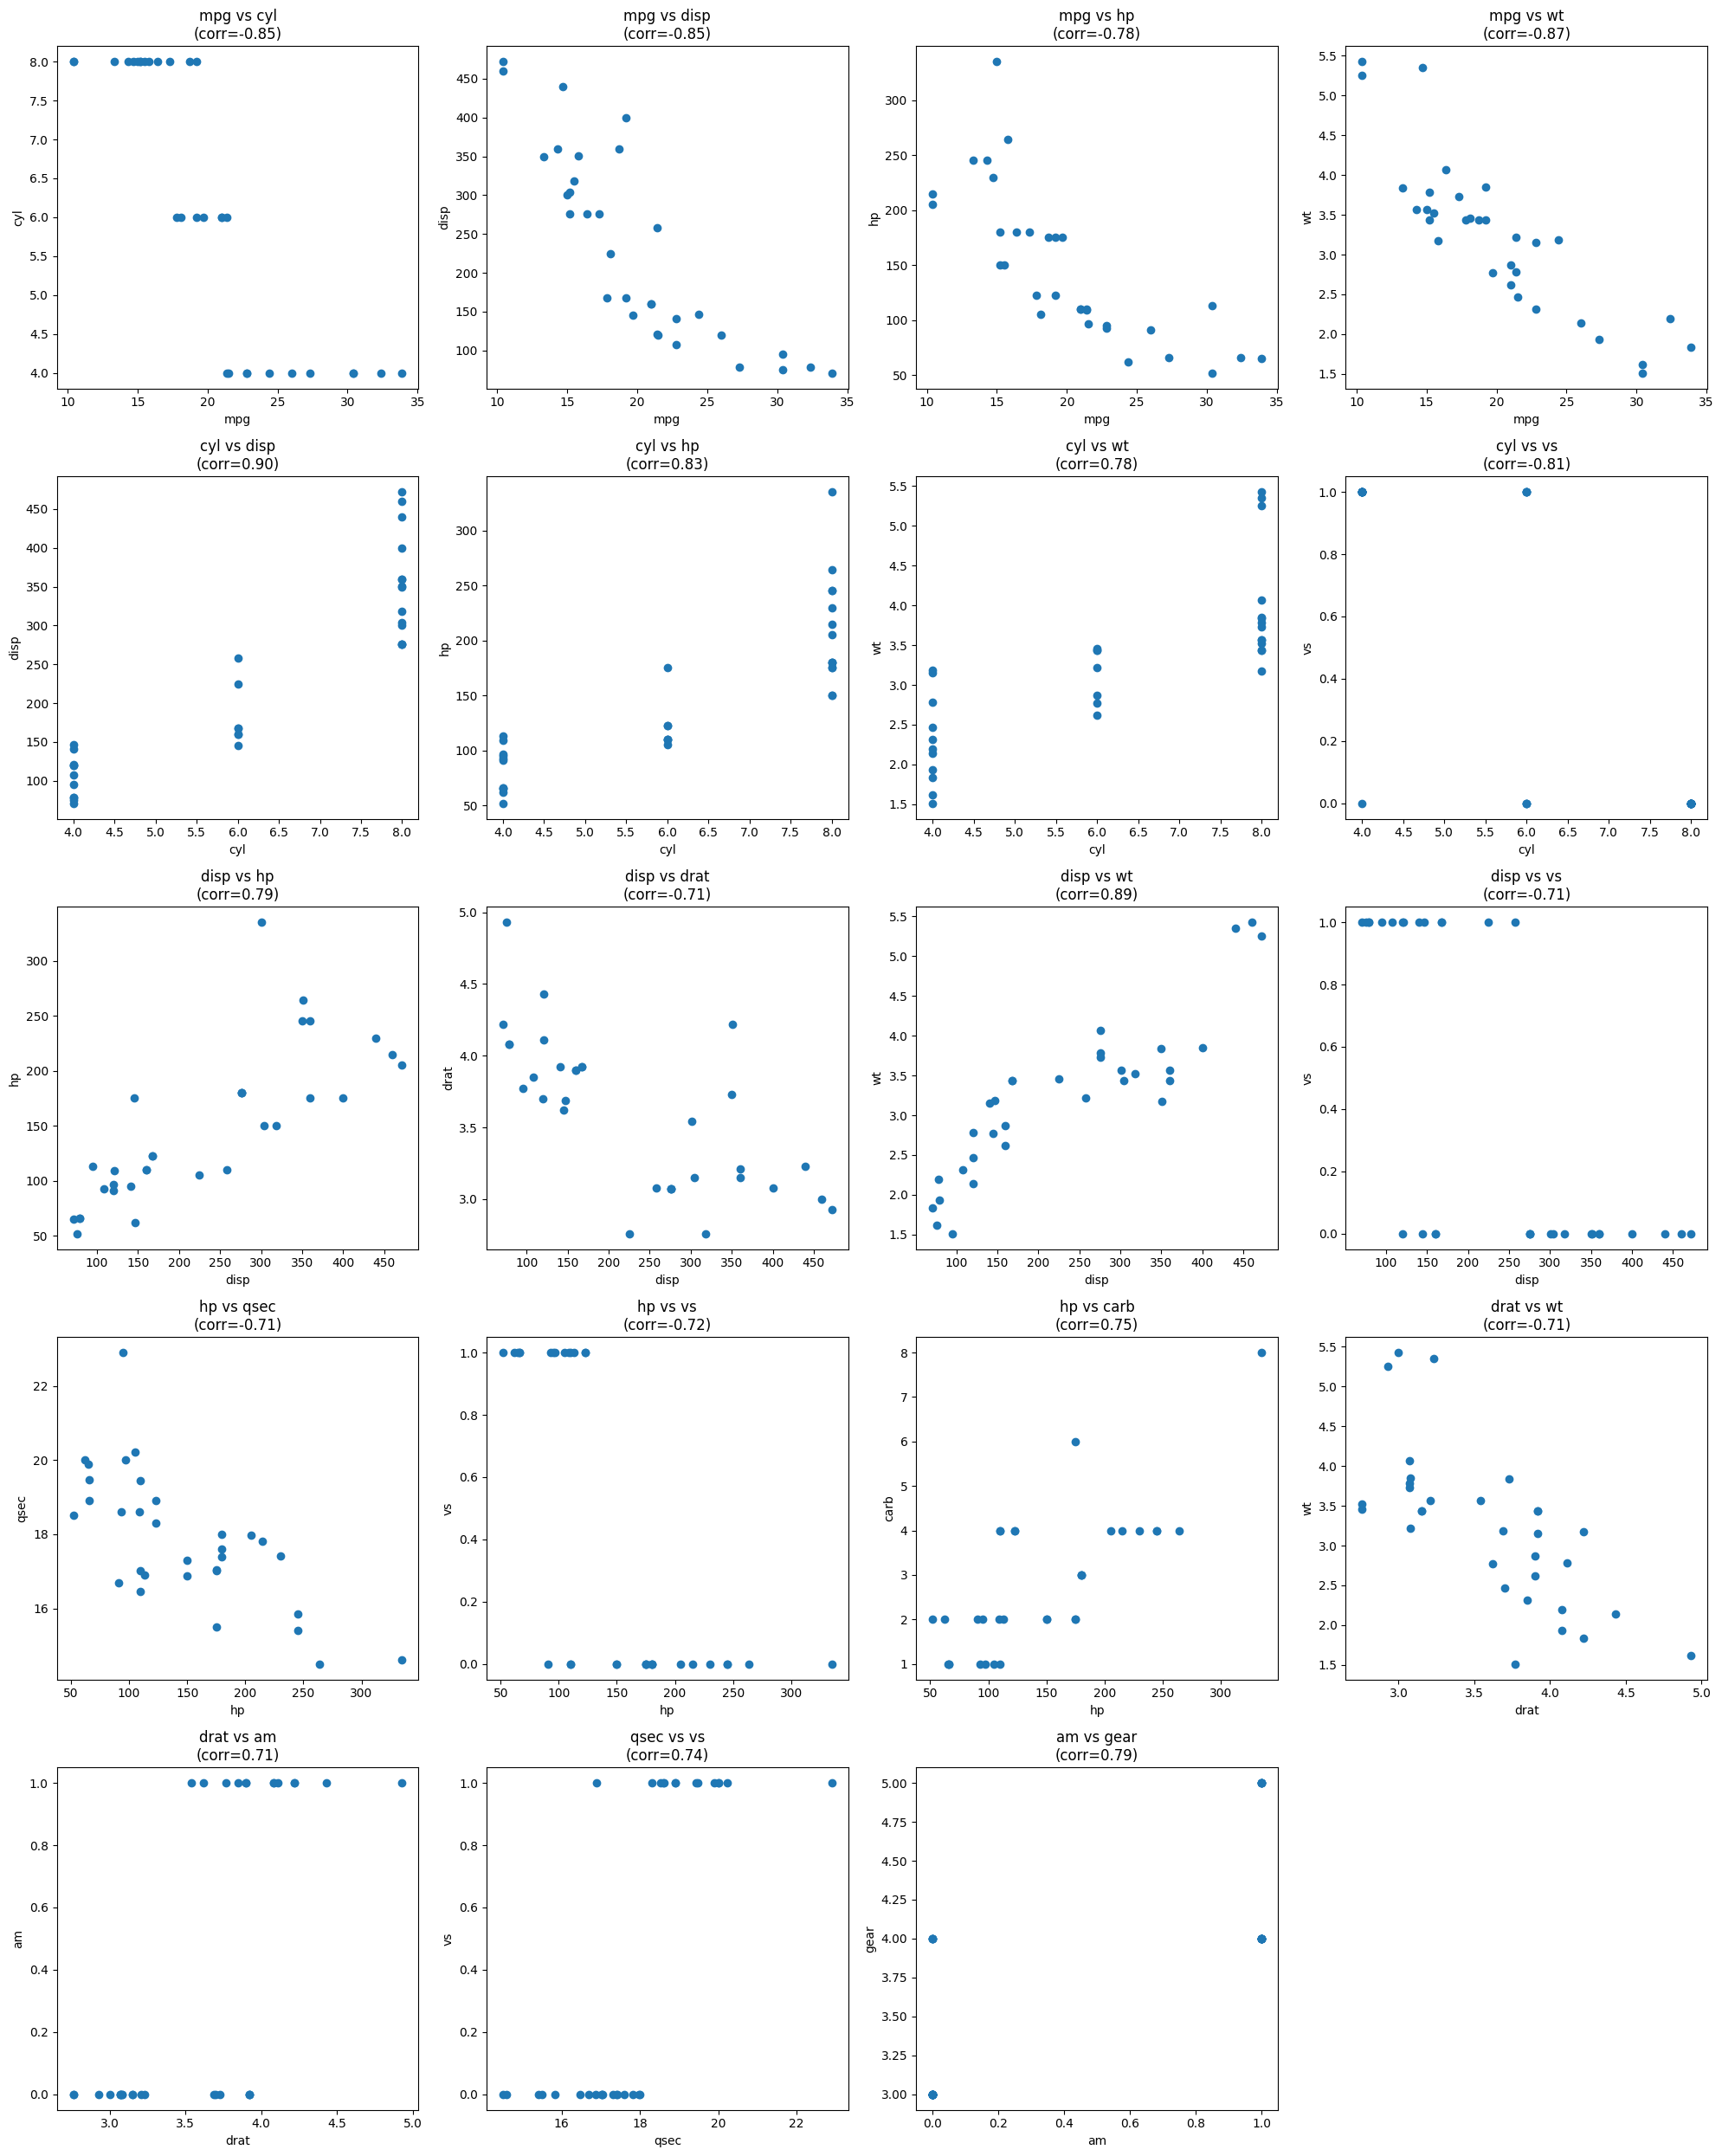

In [17]:
n_rows, n_cols = 5, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()

for idx, (x, y, corr_val) in enumerate(high_corr_pairs):
    ax = axes[idx]
    ax.scatter(num_df[x], num_df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x} vs {y}\n(corr={corr_val:.2f})")

for j in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

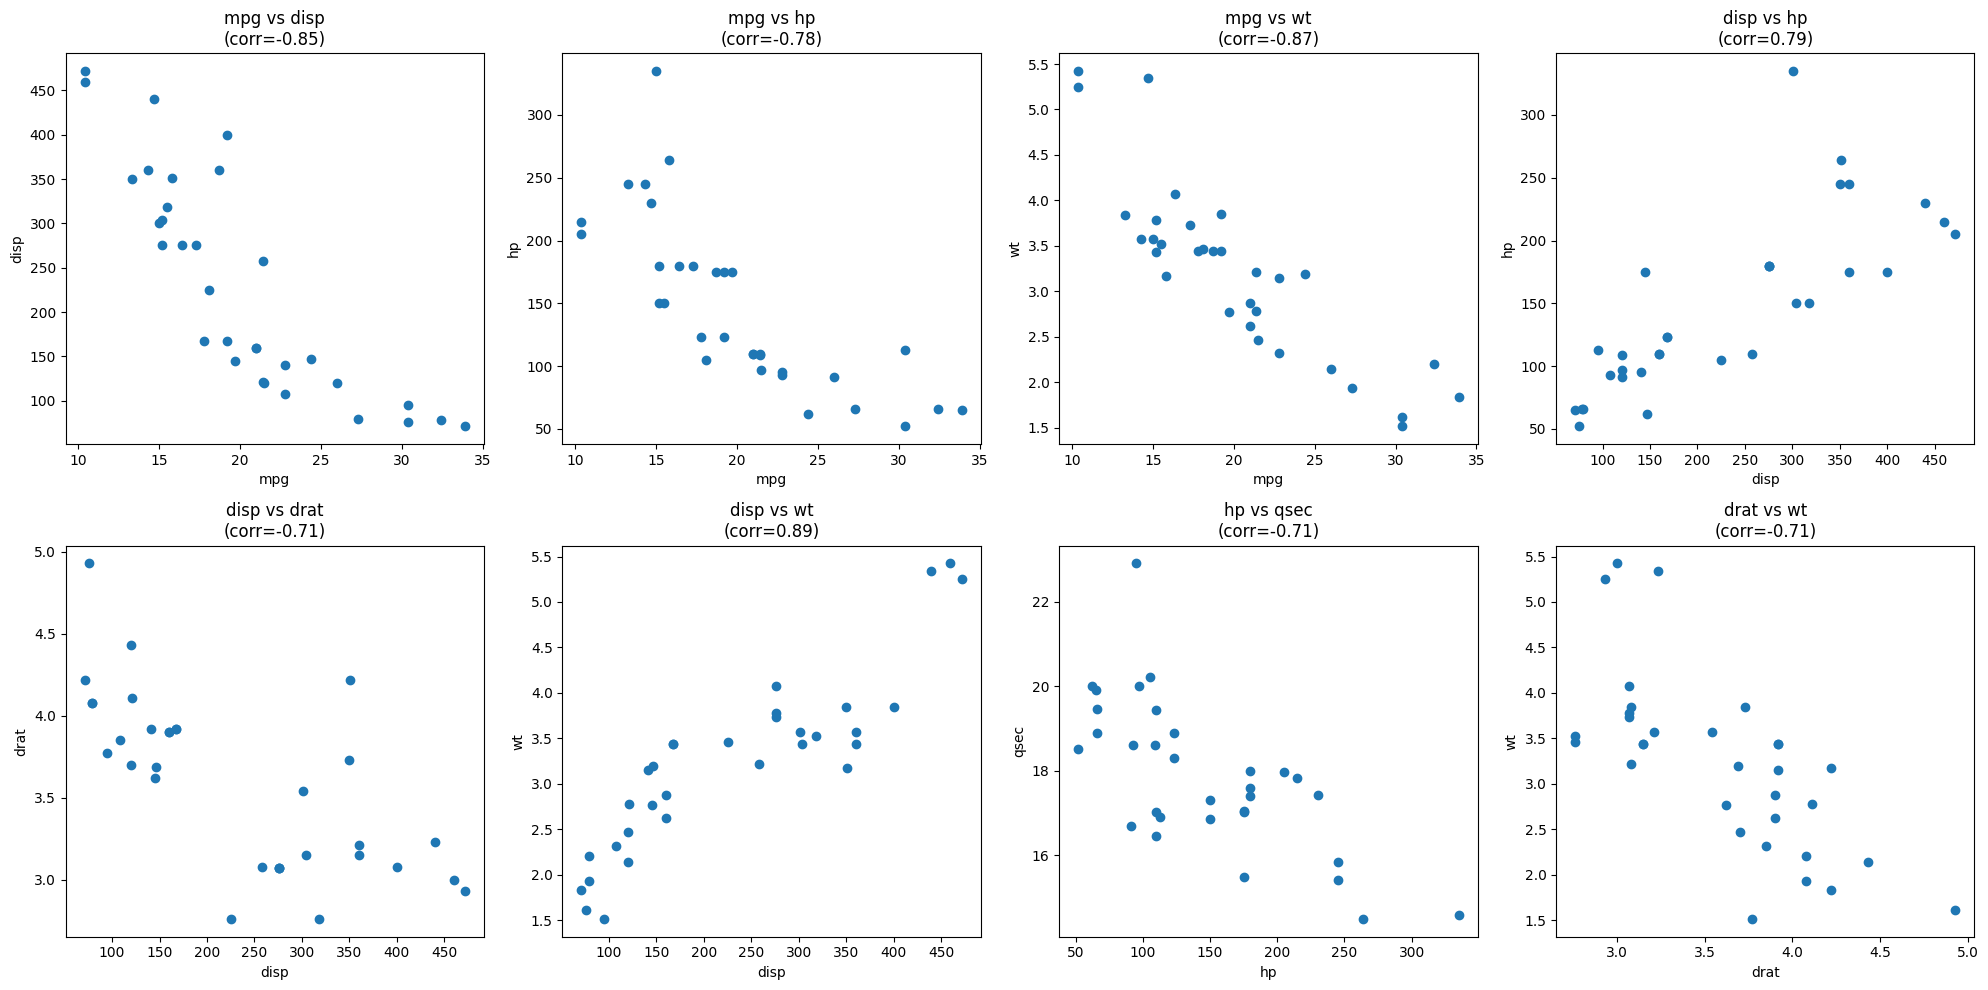

In [22]:
semi_categorical = {"cyl", "vs", "am", "gear", "carb"}

filtered_pairs = [
    (x, y, corr_val)
    for (x, y, corr_val) in high_corr_pairs
    if x not in semi_categorical and y not in semi_categorical
]

n_rows, n_cols = 2, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for idx, (x, y, corr_val) in enumerate(filtered_pairs):
    ax = axes[idx]
    ax.scatter(num_df[x], num_df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x} vs {y}\n(corr={corr_val:.2f})")


plt.tight_layout()
plt.show()